# Problem Statement:

Axis Bank, a reputable Indian bank, is an offline-online institution that provides the full range of financial services to customer categories including mid sized & large corporations, retail businesses, MSME, and agricultural.

The bank wants to forecast whether a customer would leave based on their demographics and attributes because we all know that acquiring new customers is more expensive than keeping the ones you already have.


We'll examine customer behavior, identify individuals who may leave, and forecast who will do so first. According to our client, it costs more money and is a lot difficult to achieve new customers than it does to keep the ones they already have.

To better understand the client's issue and expectations, our domain experts and data analysts met with them at the Axis Bank corporate office.


To better understand the client's issue and aspirations, our data analysts and subject experts met with them at the Axis Bank headquarters. So they simply requested the client for the required information.

The client wants us to desing a ML pipeline that can forecast which clients will leave the business. Estimating whether or not consumers leave a bank is the goal.

so that the client may create customer retention campaigns and loyalty programs to keep as many consumers as feasible.


Data Set Story:

It has 12 variables and 10,000 observations.

Information about clients is contained in independent variables.

Customer desertion is referred to as a dependent variable.



RowNumber— has no bearing on the output and relates to the record (row) number. has no impact on a consumer leaving the bank and contains random values.

Surname: A customer's choice to leave a bank is unaffected by their surname.

CreditScore—since a customer having a better credit score is less likely to churn the bank, it may have an impact on customer churn.


Geographical location may have an impact on a customer's choice to quit the bank.


Gender: It's intriguing to checks whether a customer's gender influences their choice  to leave the bank.


Age—this factor is unquestionably important because older clients are less likely than younger ones to abandon their bank.


tenure: refers to the length of time that a customer has been a bank client. Typically, elder customers are more dependable and less likely to abandon a bank.


Balance: Another excellent predictor of customer churn, since customers with higher account balances are less likely to leave their bank than those with lower balances.


Number of Products: refers to the total number of goods a customer has acquired from the bank.


hasCrCard: Whether a consumer has a credit card is shown by the hasCrCard function. This column is also pertinent because cardholders are less likely to leave the bank.


IsActiveMember: Returning consumers who are active are less likely to do so


EstimatedSalary: Just like with balance, individuals with lesser salary have a higher propensity to quit the bank.


Exited—whether or not the customer left the bank. (0 = No, 1 = Yes)


Our Approach:

The only way the bank might possibly profit from this analysis, if we strive to comprehend the business issue at hand, is if we accurately identify the clients who are most likely to leave the bank.

Instead of maximizing the accuracy score and roc auc score for this, we should concentrate on raising the recall score.

We can only achieve the intended outcome by increasing the True Positives and minimizing the False Negatives because the dataset is unbalanced.

#Import Libraries 

In [113]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import normaltest,shapiro, chi2

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2, mutual_info_classif

from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import  SMOTE

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier


import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

Here, I've imported 3 types of Libraries

a) Inbuilt Library


b) Third-Party Library


c) Skitlearn & TensforFlow Library

# Load Dataset

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


According to client inputs, our domain experts and data analysts team created the dataset in.CSV format. Additionally, we will train our machine learning (ML) algorithm using the same dataset.

Load the dataset files with csv extension from the dataset folder.

# Exploratory Data Analysis(EDA)

In [108]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

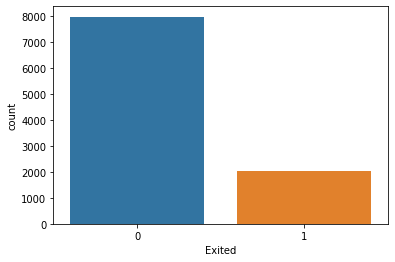

In [109]:
sns.countplot(x='Exited', data=df)

In [110]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

## Normality

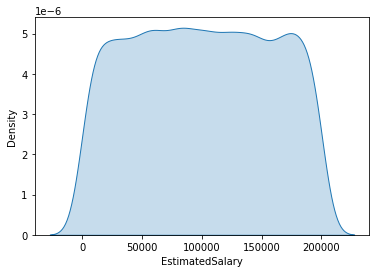

In [4]:
sns.kdeplot(df['EstimatedSalary'], fill = True)

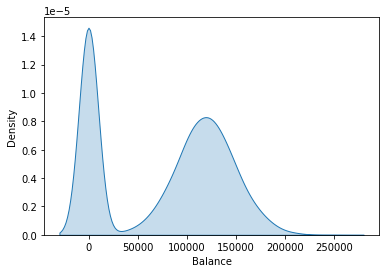

In [5]:
sns.kdeplot(df['Balance'], fill = True)

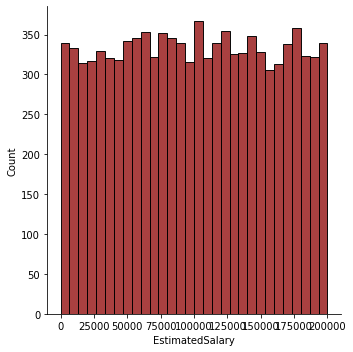

In [6]:
sns.displot(df['EstimatedSalary'],color='darkred',bins=30)

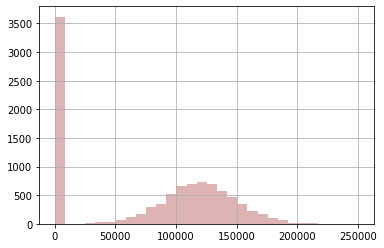

In [7]:
df['Balance'].hist(color='darkred',bins=30,alpha=0.3)

## Outlier's Detection

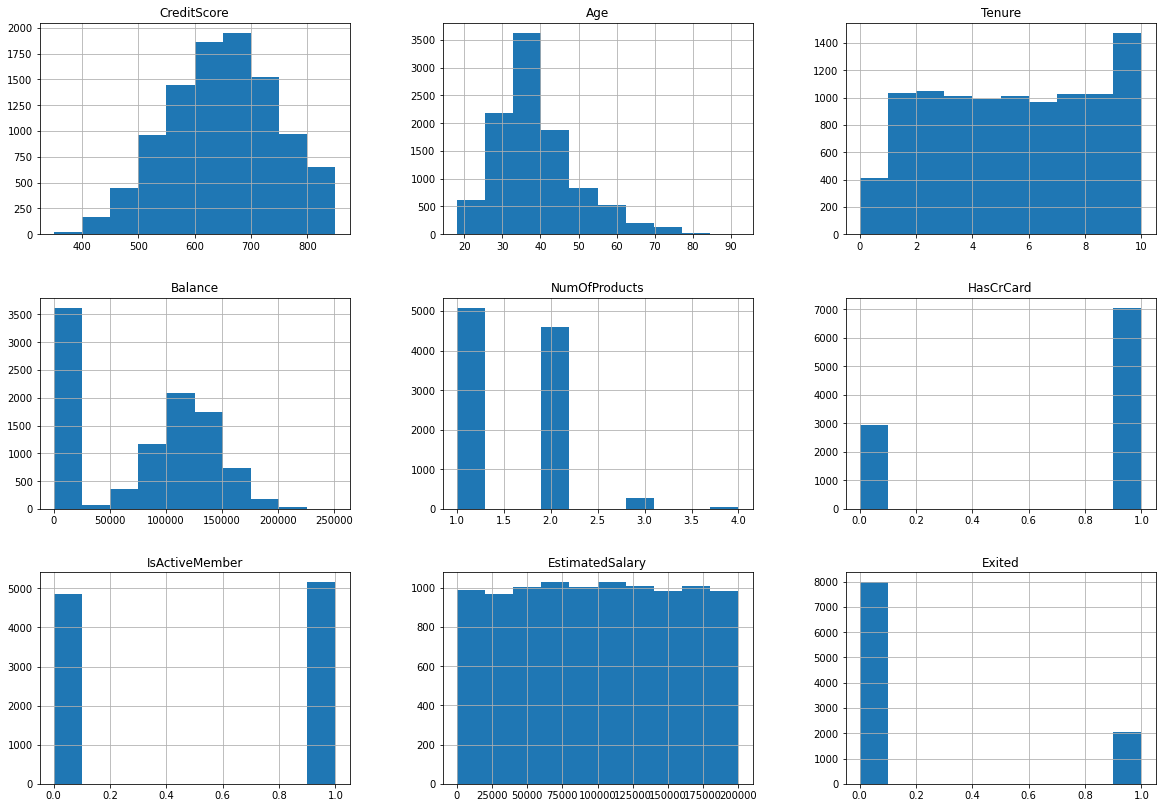

In [126]:
df.hist(figsize=(20,14))
plt.show()

### Normaltest & Shapiro

In [8]:
status,p_val = normaltest(df['EstimatedSalary'])
print('p value is :', p_val)
if p_val.all() > 0.05:
    print('Null hypothesis >> Data is Normally Distributed')
else:
    print('Alternate Hypothesis >> Data is not Normally distributed')

p value is : 0.0
Alternate Hypothesis >> Data is not Normally distributed


In [129]:
_,p_val = shapiro(df['EstimatedSalary'])
print('p value is :', p_val)
if p_val > 0.05:
     print('Null hypothesis >> Data is Normally Distributed')
else:
    print('Alternate Hypothesis >> Data is not Normally distributed')

p value is : 0.0
Alternate Hypothesis >> Data is not Normally distributed


/usr/local/lib/python3.8/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### Z-Score Test

In [10]:
mean = df['EstimatedSalary'].mean()
std = df['EstimatedSalary'].std()
print('mean: ', mean)
print('std: ', std)

print('*'*100)

threshold = 3
outliers = []
for val in df['EstimatedSalary']:
    z_score = (val - mean)/std
    if np.abs(z_score) > threshold:
        outliers.append(val)
        
print('Detected Outliers are:',outliers)

mean:  100090.239881
std:  57510.49281769816
****************************************************************************************************
Detected Outliers are: []


### IQR Method

In [11]:
q1 = df['EstimatedSalary'].quantile(0.25)
q2 = df['EstimatedSalary'].quantile(0.5)
q3 = df['EstimatedSalary'].quantile(0.75)
print(f'1st Quartile  >> 25th percentile of the data = {q1}')
print(f'2nd Quartile  >> 50th percentile of the data = {q3}')
print(f'3rd Quartile  >> 75th percentile of the data = {q3}')
print('*'*112)

iqr = q3 - q1
print('Inter Quartile Range(IQR): ', iqr)
print('*'*112)

lower_tail = q1 - 3 * iqr #Extreme Outliers
upper_tail = q3 + 3 * iqr #Extreme Outliers
print('Lower tail is :',lower_tail)
print('Upper tail is :',upper_tail)

print('*'*100)

outliers = []
for i in range(len(df)):
    df.loc[i,'EstimatedSalary']
    if (i > q1+(1.5*iqr)) or (i < q1-(1.5*iqr)):
        outliers.append(i)

print('Outliers for EstimatedSalary: ', outliers)

1st Quartile  >> 25th percentile of the data = 51002.11
2nd Quartile  >> 50th percentile of the data = 149388.2475
3rd Quartile  >> 75th percentile of the data = 149388.2475
****************************************************************************************************************
Inter Quartile Range(IQR):  98386.1375
****************************************************************************************************************
Lower tail is : -244156.3025
Upper tail is : 444546.66
****************************************************************************************************
Outliers for EstimatedSalary:  []


### Boxplot Method

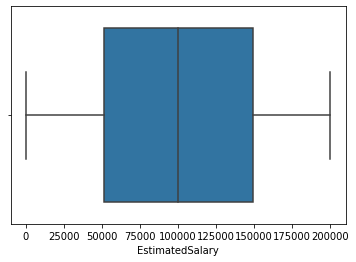

In [12]:
sns.boxplot(x= df['EstimatedSalary'])

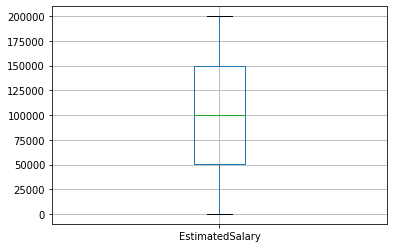

In [13]:
df.boxplot('EstimatedSalary')

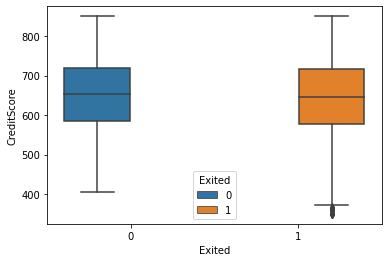

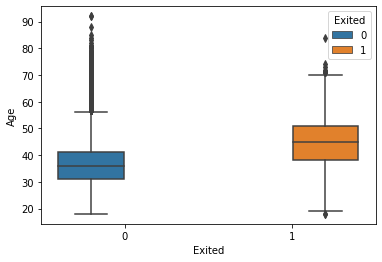

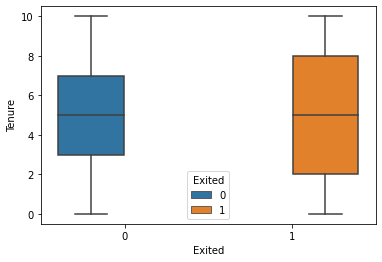

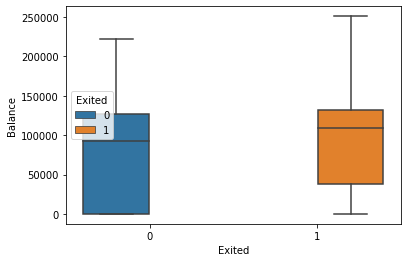

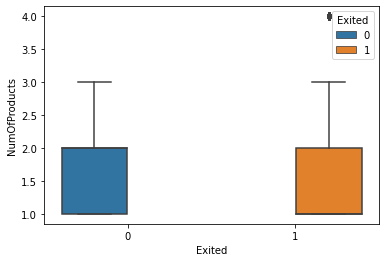

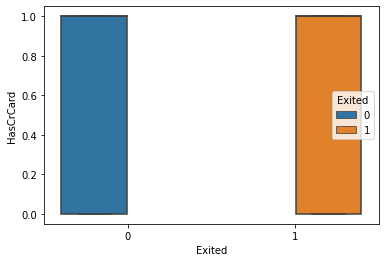

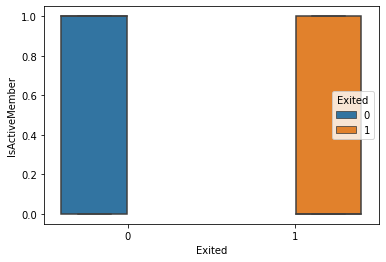

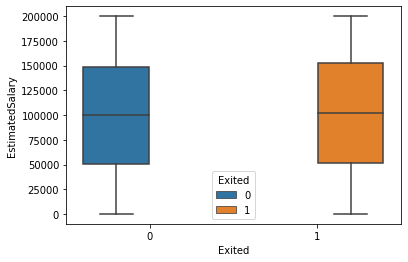

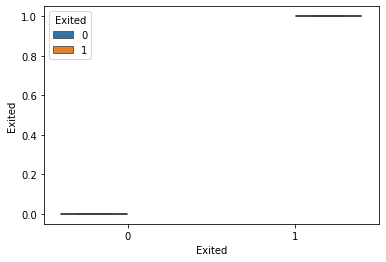

In [125]:
for c in df.select_dtypes(exclude='object').columns:
    sns.boxplot(data=df, x= 'Exited', y= c, hue='Exited')
    plt.show()

In [14]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Feature Selection

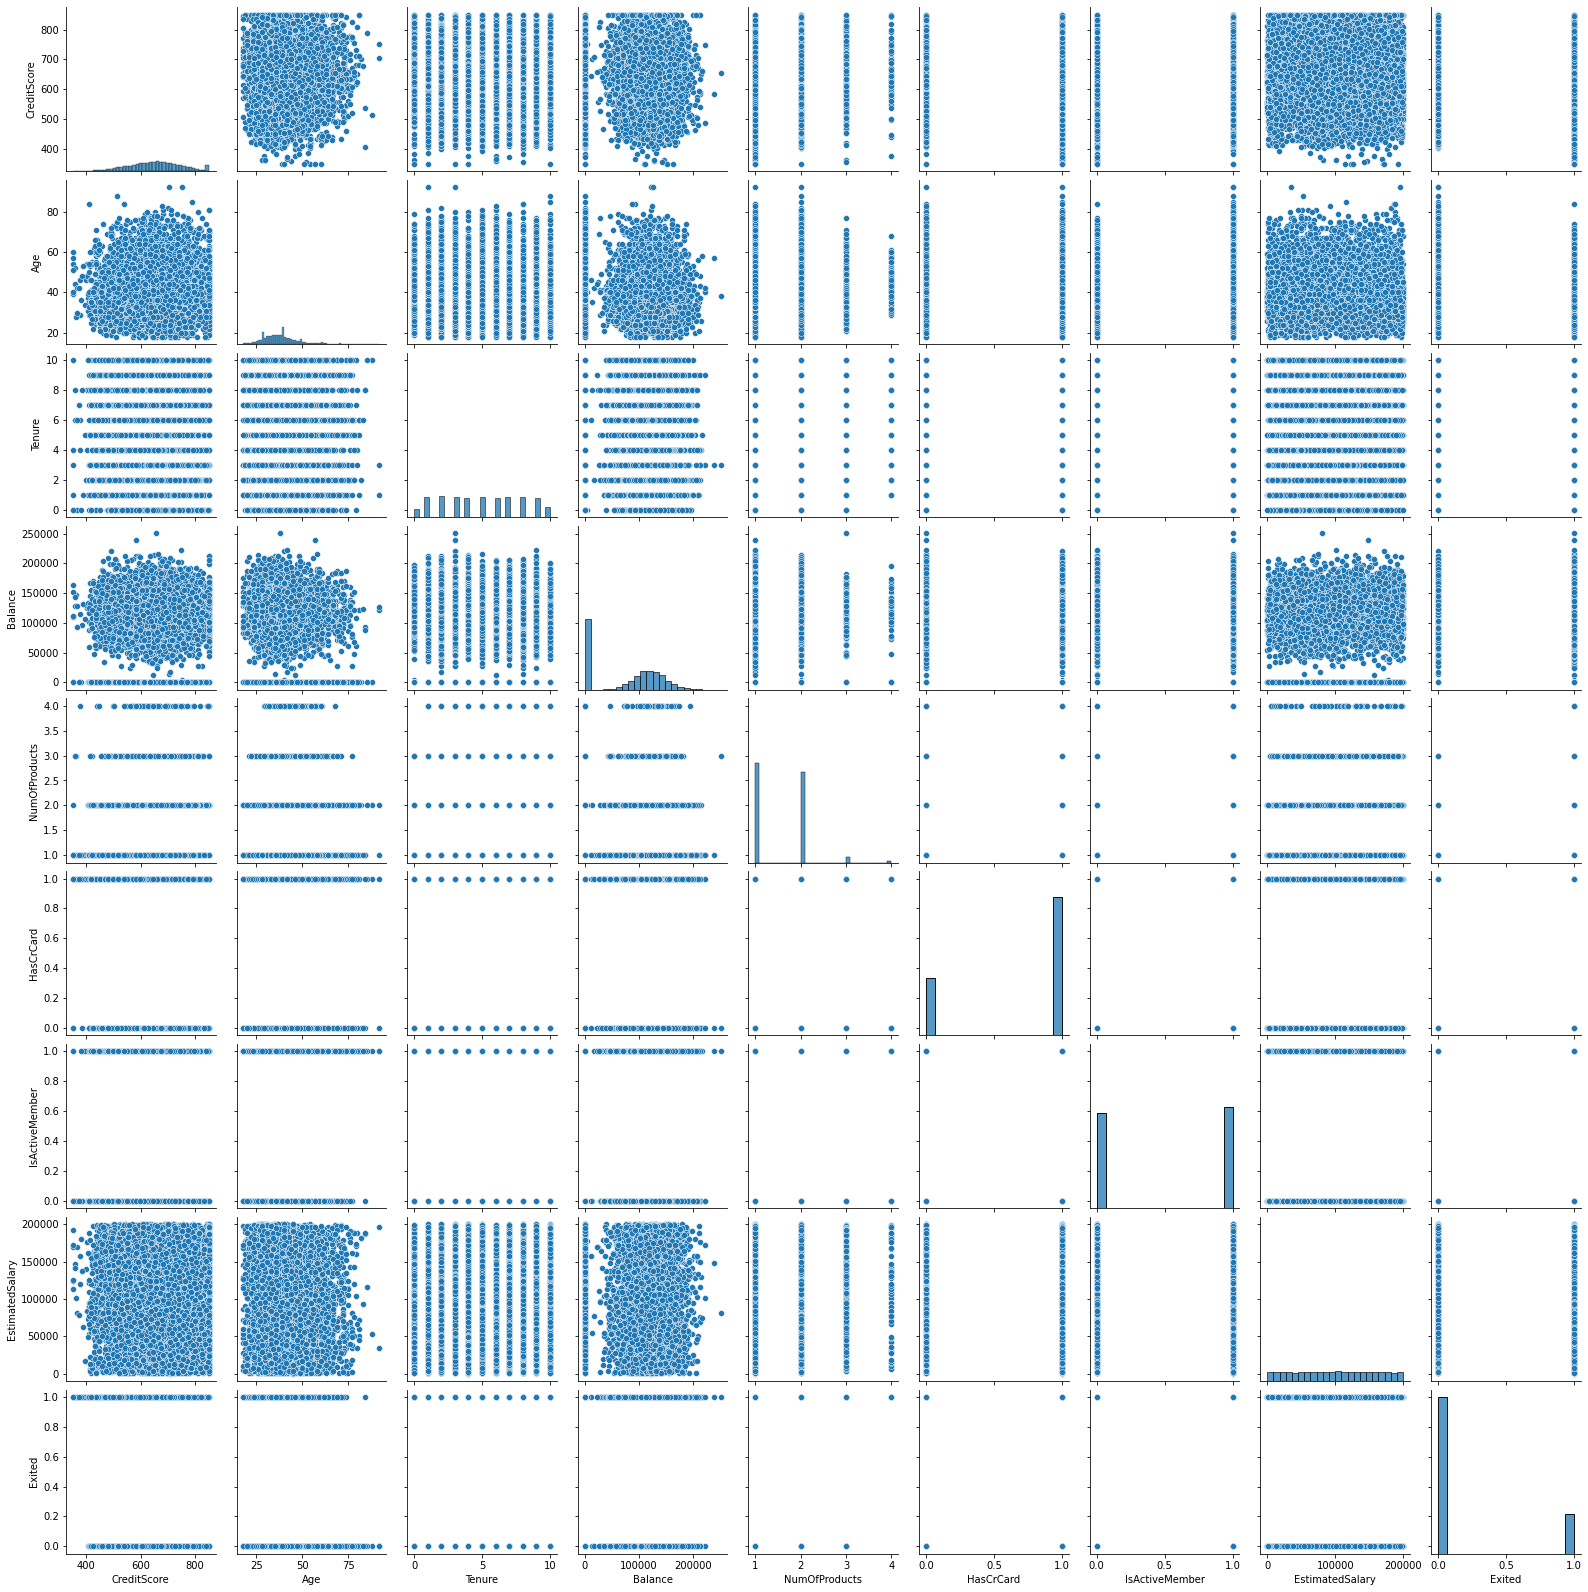

In [127]:
sns.pairplot(df)
plt.show()

### Correlation Method

In [15]:
correlation = df.corr()['Exited']
correlation

CreditScore       -0.027094
Age                0.285323
Tenure            -0.014001
Balance            0.118533
NumOfProducts     -0.047820
HasCrCard         -0.007138
IsActiveMember    -0.156128
EstimatedSalary    0.012097
Exited             1.000000
Name: Exited, dtype: float64

Checked correlation of target/dependent labels with dependent features.

### Heatmap

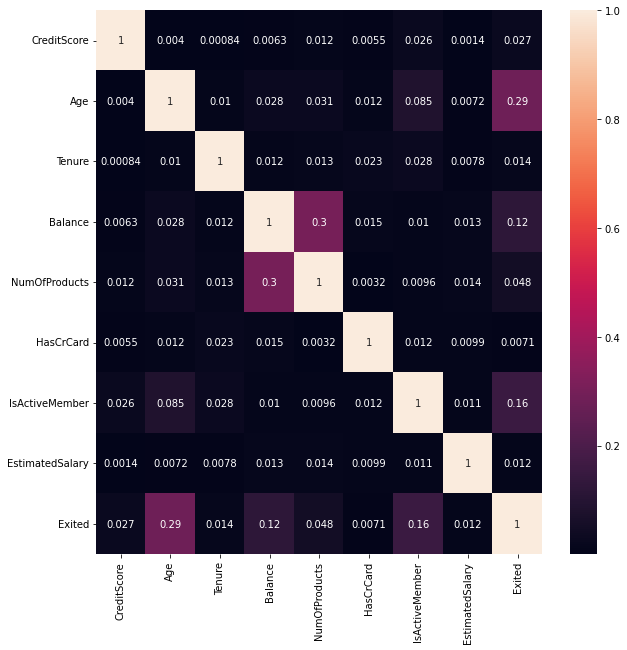

In [87]:
correlation = df.corr().abs()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot=True)
plt.show()

There is much of correlation between any of the variables. The highest correlation is 0.29, which is between Age and Exited, which suggests a small positive relationship between Age and Customer Churn. A further analyis of the scatter plots show that there could be a relationship between Credit Score, Age, Balance, Number of Products with Exited respectively.

### Missing Value Ratio Method

In [19]:
missing_val = (df.isna().sum())/df.shape[0] * 100
missing_val.sort_values(ascending = False)

CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

### Heatmap Technique 

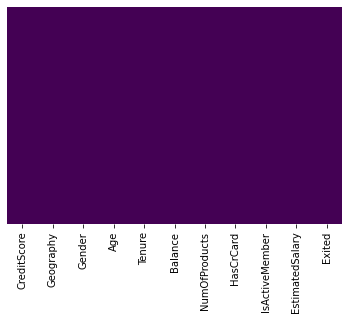

In [20]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [21]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


df.info() >> This gives us information about the attributes, data type of the attribute, information about the null values of the attributes, memory size of the class which is 39.0+ KB.

We have observed that all the attributes are having 'Object' dtype.

In [24]:
for i in list(df.select_dtypes(include='object')):
    print(True)
else:
    print(False)

True
True
False


In [25]:
list(df.select_dtypes(include='object'))

['Geography', 'Gender']

In [26]:
list(df.select_dtypes(include='float'))

['Balance', 'EstimatedSalary']

In [27]:
list(df.select_dtypes(include='int'))

['CreditScore',
 'Age',
 'Tenure',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'Exited']

In [28]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [29]:
df_train, df_test = train_test_split(df, test_size=0.2)
print('Shape of df_train: ',df_train.shape)
print('Shape of df_test: ',df_test.shape)

Shape of df_train:  (8000, 11)
Shape of df_test:  (2000, 11)


To prevent the problem of data leakage, we divided the data at the very beginning of the task. When the information that we use to train a machine learning algorithm is present in the training data, this is referred to as data leakage in machine learning. As a result, we divide the testing data from the training data (used to train the model) (To predict the data outcome).

##  Data Preprocessing and Feature Engineering 

In [3]:
df.drop(['RowNumber','CustomerId','Surname'], axis=1, inplace=True)
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Seperating Features and Target Lable

In [30]:
X_train = df_train.drop(['Exited'], axis= 1)
y_train = df_train['Exited']

X_test = df_test.drop(['Exited'], axis= 1)
y_test = df_test['Exited']

print('x_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('x_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

x_train shape:  (8000, 10)
y_train shape:  (8000,)
x_test shape:  (2000, 10)
y_test shape:  (2000,)


X_train = df_train.drop(['Exited'],axis=1) >> this will drop the 'Exited' attribute and pass all the Independent attributes to the X_train

y_train = df_train['Exited'] >> will assign only dependent attribute ('Exited' variable) to y_train

### Encoding Categorical Attributes

In [31]:
enc= OneHotEncoder(handle_unknown='ignore')
enc.fit(X_train)

X_train= enc.transform(X_train)

X_test=enc.transform(X_test)

print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)

print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

X_train shape:  (8000, 13629)
y_train shape:  (8000,)
X_test shape:  (2000, 13629)
y_test shape:  (2000,)


Here, I've used the OneHotEncode Class to build a single Object (enc). I then only fit my "enc" using the data from X train, not the entire dataset or X test. Here, "enc" Object used a training dataset to learn how to encode categorical properties.

If had been handle unknown='error' used, If one categorical characteristic in our X test in our X test has a new value that was not present in the X train. If an unknown category is present during the transform, OneHotEncoder will then raise an error. 

As is well known, only numerical features can be used by machine learning algorithms. ML Algorithm are not capable to comprehend categorical features. "Nominal Categorical Features" are shown here.

We so employed the OneHotEncoder method, Each binary unique value will be converted into numerical value  as per categorical characteristics by OneHotEncoder.

Depending on how many distinct values there are in the original categorical attribute, it will produce new attributes.

Our dimensionality has been expanded here in accordance with our category variables.

### Standardization

In [32]:
scaler = StandardScaler(with_mean=False)
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)

print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

X_train shape:  (8000, 13629)
y_train shape:  (8000,)
X_test shape:  (2000, 13629)
y_test shape:  (2000,)


Standardization (Z_score normalization) >> It is a Transformed version of your features. It is normal distribution with "mean = 0" & "standard deviation = 1".
Standardization = (each feature - mean of feature) / (standard deviations)

standardization is a better default option to use. Also, I checked the accuracy with Normalization but it was not impressive. Hence I choose standardization.

In [33]:
pd.DataFrame(X_train.toarray(), columns=scaler.get_feature_names_out())

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x13619,x13620,x13621,x13622,x13623,x13624,x13625,x13626,x13627,x13628
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Dimensionality Reduction

In [34]:
pca = PCA(n_components=50)
pca.fit(X_train.toarray())

X_train = pca.transform(X_train.toarray())
X_test = pca.transform(X_test.toarray())

print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)

print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

X_train shape:  (8000, 50)
y_train shape:  (8000,)
X_test shape:  (2000, 50)
y_test shape:  (2000,)


PCA (Principle Component Analysis) algorithm  will projecting data points from one "Dth Dimensional Space" to another "Dth Dimensional Space" in order to reduce the dimensionality of the data.

The PCA algorithm will attempt to determine the principal components that have orthogonal dimensions and produce the "Highest Variance" of the data after projection from a higher dimensional.

### Balancing Data

In [35]:
sm = SMOTE()
X_train, y_train = sm.fit_resample(X_train, y_train)

print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)

print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

X_train shape:  (12712, 50)
y_train shape:  (12712,)
X_test shape:  (2000, 50)
y_test shape:  (2000,)


We are adopting SMOTE, which stands for "Synthetic Minority Oversampling Technique," because we are seeing an imbalance in the class. By adding fictitious data points to boost the number of observations in the minority class, it balances the data. As a first stage, SMOTE uses a k-nearest neighbors strategy to identify data points nearby in the feature space. Once projected, the lines connecting the data points are used to produce fictitious observations.

## Model Training

### Algorithm Selection And Hyperparameter Tunning

#### Model_1 >> RandomForest Classifier

In [39]:
parameter_grids = {'n_estimators' : range(50,210,50),
                   'criterion': ['gini', 'entropy'],
                  'max_depth' : range(2,8,3), 
                  'max_features':[0.25,0.5,1.0],
                  'min_samples_split' : range(2,8,3),
                  'ccp_alpha' : np.arange(1,3)}

model_1 = RandomizedSearchCV(RandomForestClassifier(),
                      param_distributions=parameter_grids,
                      n_iter=6,
                      scoring='recall',
                      error_score='raise',
                      cv=5,
                      n_jobs=-1)


model_1.fit(X_train,y_train)

print('Recall Score of RandomForestClassifier = {:.2f}'.format(model_1.best_score_))
print('Best found Hyperparameter of RandomForestClassifier = {}'.format(model_1.best_params_))

Recall Score of RandomForestClassifier = 0.80
Best found Hyperparameter of RandomForestClassifier = {'n_estimators': 200, 'min_samples_split': 2, 'max_features': 0.25, 'max_depth': 2, 'criterion': 'gini', 'ccp_alpha': 1}


***n_estimators***: The number of trees in the forest.

***criterion***: measuring a split's quality using this function. Gini impurity support criteria and information gain support criteria are "gini" and "entropy," respectively.

***max_depth***: It determines the deepest point of the tree's . If we set no value, nodes expand until all leaves are pure or until all leaves contain less samples than "min samples split" samples, whichever comes first.

***min_sample_split***: The least amount of samples necessary to separate an internal node

***ccp_alpha***: For Minimal Cost-Complexity Pruning, the complexity parameter is used. It will select the subtree with the highest cost complexity that is less than "ccp alpha." By default, pruning is not carried out.

A sample selected with substitution from the training dataset, a bootstrap sample, or both are used to build each tree in a random forest ensemble.
Additionally, while splitting each and every node while tree formation, the best split is computed from either all input features or a randomly chosen subset of size max features.
The variance of the forest estimator is reduced by these two randomness sources. In actuality, individual decision trees frequently exhibit significant diversity and a predisposition for overfitting. By adding randomization to forests, decision trees with partially separated prediction errors are created. By averaging their projections, certain errors can be removed. Random forests reduce variation by combining multiple trees, however occasionally at the expense of a slight rises in bias. The variance decrease is typically remarkable, leading to an overall better model.

#### Model_2 >> AdaBoost Classifier

In [36]:
parameter_grids = {'n_estimators' : range(50,310,50),
                   'learning_rate': [0.01,0.10,0.5,1]
                   }

model_2 = RandomizedSearchCV(AdaBoostClassifier(),
                      param_distributions= parameter_grids,
                      n_iter= 10,
                      scoring='recall',
                      error_score='raise',
                      cv=5,
                      n_jobs=-1)

model_2.fit(X_train,y_train)

print('Recall Score of AdaBoostClassifier = {:.2f}'.format(model_2.best_score_))
print('Best found Hyperparameter of AdaBoostClassifier = {}'.format(model_2.best_params_))

Recall Score of AdaBoostClassifier = 0.89
Best found Hyperparameter of AdaBoostClassifier = {'n_estimators': 100, 'learning_rate': 0.01}


#### Model_3 >> GradientBossting Classifier

In [37]:
parameter_grids = {'n_estimators' : range(50,310,50),
                   'loss' : ['deviance', 'exponential'],
                   'criterion' : ['friedman_mse', 'squared_error'],
                   'learning_rate': [0.01,0.10,0.5,1],
                   'min_samples_leaf' : np.arange(2,15,3),
                  'min_samples_split' : range(2,15,3),
                   'ccp_alpha' : np.arange(1,5)
                   }

model_3 = RandomizedSearchCV(GradientBoostingClassifier(),
                      param_distributions= parameter_grids,
                      n_iter= 10,
                      scoring='recall',
                      error_score='raise',
                      cv=5,
                      n_jobs=-1)

model_3.fit(X_train,y_train)

print('Recall Score of GradientBoostingClassifier = {:.2f}'.format(model_3.best_score_))
print('Best found Hyperparameter of GradientBoostingClassifier = {}'.format(model_3.best_params_))

Recall Score of GradientBoostingClassifier = 0.80
Best found Hyperparameter of GradientBoostingClassifier = {'n_estimators': 250, 'min_samples_split': 2, 'min_samples_leaf': 2, 'loss': 'exponential', 'learning_rate': 1, 'criterion': 'squared_error', 'ccp_alpha': 1}


#### Model_3 >> XGBoost Classifier

In [38]:
parameter_grids = {
    'gamma': [i/10.0 for i in range(0,5)],
    'learning_rate': [0.001,0.001, 0.01, 0.1, 1],
    'colsample_bytree': [i/10.0 for i in range(3,10)],
    'reg_lambda': [1e-5, 1e-2, 0.1, 1, 10, 100],
    'reg_alpha': [1e-5, 1e-2, 0.1, 1, 10, 100]
    }

model_4 = RandomizedSearchCV(estimator=XGBClassifier(), 
                            param_distributions= parameter_grids,
                            n_iter=10,
                           scoring='recall',
                            n_jobs=-1, 
                           cv=5)
model_4.fit(X_train,y_train)

print('Recall Score of XGBoostClassifier = {:.2f}'.format(model_4.best_score_))
print('Best found Hyperparameter of XGBoostClassifier = {}'.format(model_4.best_params_))


Recall Score of XGBoostClassifier = 0.88
Best found Hyperparameter of XGBoostClassifier = {'reg_lambda': 100, 'reg_alpha': 100, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 0.8}



***Learning rate*** reduces the weights to increase the conservatism of the boosting procedure The complexity of the model increases as the tree's maximum depth increases.

***Gamma*** defines the minimum loss decrease necessary to make a split. % of each tree's columns that will be selected at random.

***reg_alpha*** increases the weight's l1 regularization, thus models with larger values are more conservative.

***reg_lambda*** gives the weight l2 regularization; greater values produce more conservative models.


#### Model_5 >> TensorFlow 

In [41]:
model = tf.keras.Sequential()

# Create Input Layer
model.add(tf.keras.layers.Input(shape= (50, )))

#Create Hidden_Layer_1
model.add(tf.keras.layers.Dense(units = 40, activation = 'relu', kernel_initializer = 'he_normal'))

#create Hidden_layer_2
model.add(tf.keras.layers.Dense(units = 30, activation = 'relu', kernel_initializer = 'he_normal'))

#create Hidden_layer_3
model.add(tf.keras.layers.Dense(units = 15, activation = 'relu', kernel_initializer = 'he_normal'))

#create Output Layer
model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid', kernel_initializer = 'glorot_normal'))

#compile the model
model.compile(optimizer= 'Adam', 
              loss = 'hinge', 
              metrics= ['accuracy','Precision','Recall'])


#Model Summary
model.summary()


# Early Stopping
early_stopper = EarlyStopping(monitor='recall',patience=10)

# Model Training
history_object_2 = model.fit(x=X_train,
                             y=y_train,
                             batch_size=512,
                             epochs=100,
                             validation_data=(X_test,y_test),
                             validation_batch_size=512,
                             use_multiprocessing=True,
                             workers=50,
                             callbacks=early_stopper)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 40)                2040      
                                                                 
 dense_1 (Dense)             (None, 30)                1230      
                                                                 
 dense_2 (Dense)             (None, 15)                465       
                                                                 
 dense_3 (Dense)             (None, 1)                 16        
                                                                 
Total params: 3,751
Trainable params: 3,751
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
25/25 [==============================] - 2s 23ms/step - loss: 0.9732 - accuracy: 0.5371 - precision: 0.5200 - recall: 0.9651 - val_loss: 1.3416 - val_accuracy: 0.4195 - val_p

In [47]:
#Visualize the Graph

def visualizer(history_object, parameter):
  plt.figure(figsize= (24,10))

  train_parameter = history_object.history.get(parameter)
  validation_parameter = history_object.history.get(f'val_{parameter}')
  epochs = history_object.epoch

  sns.lineplot(x=epochs, y = train_parameter)
  sns.lineplot(x=epochs, y = validation_parameter)

  plt.legend(labels = [parameter, f'val_{parameter}'])
  plt.xticks(ticks = epochs, labels = epochs, rotation=90)
  plt.yticks(ticks = [i/100 for i in range(10,110, 10)], labels = [i/100 for i in range(10,110, 10)])

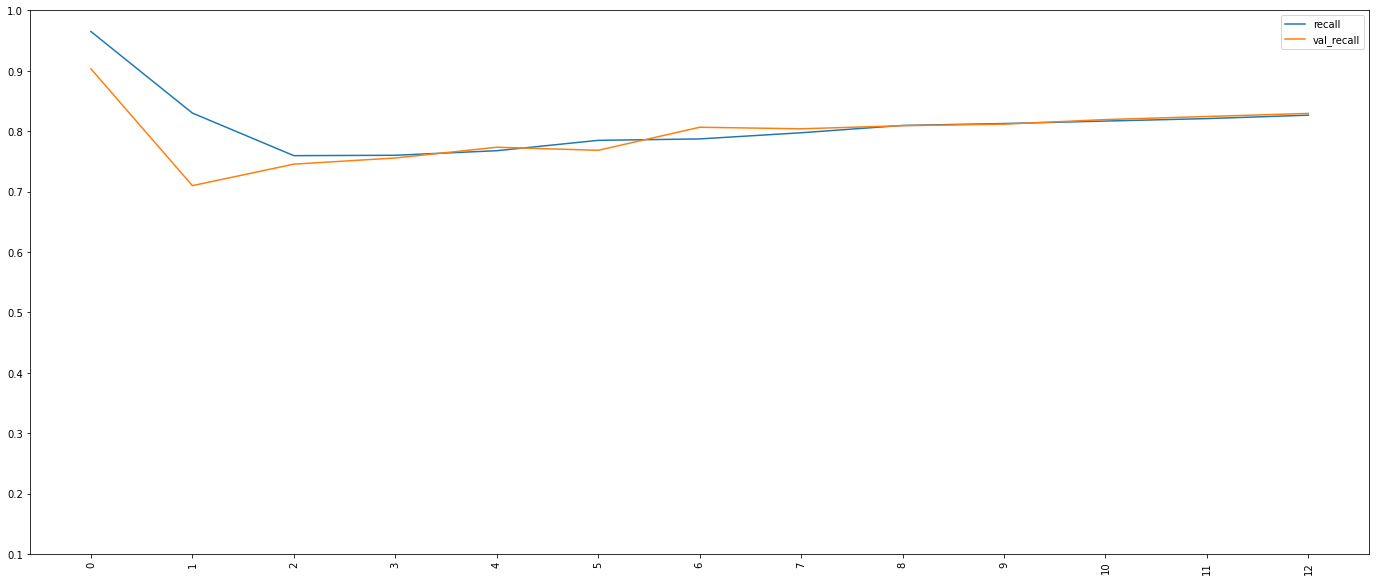

In [48]:
visualizer(history_object_2, 'recall')

In [49]:
model_weights_dir = 'Weights'
os.makedirs(model_weights_dir, exist_ok= True)

In [50]:
model.save(os.path.join(model_weights_dir, 'Best_model.tf'), save_format= 'tf')

In [51]:
loaded_model = tf.keras.models.load_model(os.path.join(model_weights_dir,'Best_model.tf'))

In [52]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 40)                2040      
                                                                 
 dense_1 (Dense)             (None, 30)                1230      
                                                                 
 dense_2 (Dense)             (None, 15)                465       
                                                                 
 dense_3 (Dense)             (None, 1)                 16        
                                                                 
Total params: 3,751
Trainable params: 3,751
Non-trainable params: 0
_________________________________________________________________


In [53]:
evaluation = loaded_model.evaluate(x=X_test, y=y_test, batch_size= 512)

4/4 [==============================] - 0s 3ms/step - loss: 1.1968 - accuracy: 0.6105 - precision: 0.3141 - recall: 0.8295


loss: 1.1968 - accuracy: 0.6105 - precision: 0.3141 - recall: 0.8295

In [78]:
y_predict_1 = model.predict(X_test)

63/63 [==============================] - 0s 2ms/step


In [79]:
y_predict_1

array([[3.2473844e-02],
       [2.3964276e-04],
       [5.4348886e-01],
       ...,
       [9.8015434e-01],
       [9.2513287e-01],
       [8.0951834e-01]], dtype=float32)

In [80]:
y_predict_1 = list(map(int, y_predict_1>0.5))
y_predict_1[:5]

[0, 0, 1, 0, 1]

In [81]:
cm_1=confusion_matrix(y_test, y_predict_1)
cm_1

array([[895, 712],
       [ 67, 326]])

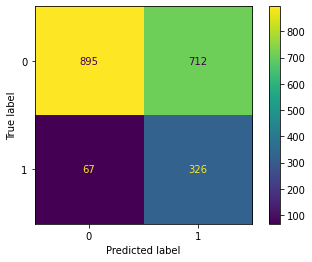

In [82]:
ConfusionMatrixDisplay(cm_1).plot()

In [105]:
report_1= classification_report(y_test,y_predict_1)
print(report_1)

              precision    recall  f1-score   support

           0       0.93      0.56      0.70      1607
           1       0.31      0.83      0.46       393

    accuracy                           0.61      2000
   macro avg       0.62      0.69      0.58      2000
weighted avg       0.81      0.61      0.65      2000



In [101]:
PRECISION = ((326)/(326+712))
PRECISION*100

31.406551059730248

Precision - It indicates the propotion of Positive Indicatione (Class_1) Which were actually correct/postive.

Model which has (NO False Positive) >> (Precision = 100). 

If model predicts lots of False positive then precison score tends to go to zero.

In [97]:
TPR_RECALL = ((326)/(326+67))  # (TP/(TP+FN))  OR (True Positive / Actual Positive) 
TPR_RECALL*100

82.95165394402035

Recall - It indicates the propotion of actual Positive (Class_1) Which were correctly classified.

Model which has (NO False Negative) >> (Recall = 100)

If model predicts lots of False Negative then precison score tends to go to zero.

In [99]:
FNR = ((67)/(67+326))   # (FN/(FN+TP))  OR (False Negative / Actual Positive) 
FNR*100

17.048346055979643

In [100]:
TNR = ((895)/(895+712))  # (TN/(TN+FP))  OR (True Negative / Actual Negative) 
TNR*100

55.693839452395764

In [96]:
FPR = ((712)/(712+895)) # (FP/(FP+TN))  OR (False Positive / Actual Negative)
FPR*100

44.306160547604236

In [102]:
accurcy = ((326+895)/(326+895+712+67))
accurcy*100

61.050000000000004

However, in this case, "Accuracy" is not an issue. The one value that is significant to us is the customer who is about to leave the bank.

### Strength Weaknesses of our Pipeline & Recommandation

***Strength Weaknesses of Our Pipeline***:- 

   **Strength** >>
        Here we have used all the techniques which generalize our model for all the data points.
        We permform operations like 
      
            "Carried out a thorough study of the data using exploratory data analysis (EDA). We comprehend data behavior using statistical methods. checked to see if the data is right or left skewed. the distribution of each quality
                        
            completed the normalcy test.
                        
            To determine if the data is distributed properly or not, we used the Noramltest and Shapiro test.
                        
            Techniques for detecting outliers
                        
            To find the outliers, we used the Z score test.
                        
            Testing each attribute's IQR (Inter Quartile Range)
                                    
            Using graphs, we plot boxplots to find outliers.
                                    
            We used methods for feature selection, such as
                        
            Using correlation method
                        
            Heatmap technique
                        
            Method of missing value ratio
                        
            "Encoding categorical Attributes using OneHotEncoder"
            
            "Standardization on the data so that they are in same range"
            
            "Dimensionality reduction Using PCA (Principle Component Analysis) so that we can have the features with Highest Variance"
            
            "We trained our model with different algorithms like (RandomForest, AdaBoost, GradientBoost, XGBoost, Tensorflow)"
            
            "We performed the Hyper-Parameter tunning to optimize the model"
            
            "We evaluate our model using Test dataset for all the algorithm"
            
            "We got high value for recall for each model"


  **Weakness** >>
          Dataset was imbalanced class. Although, I have used balancing technique like SMOTE. But we know that Undersampling and SMOTE both fall short of achieving high recall/precision values while adding unnecessary complexity to the machine learning pipeline.

The client is more worried about the clients who are getting ready to go. Considering that the data has an unbalanced class, it is crucial that we concentrate on recall value.
When the objective is unbalanced, recall and precision are helpful indicators of the prediction's success.
A low false positive rate is associated with good precision, whereas a low false negative rate is associated with strong recall. High scores for both indicate that the classifier is producing results that are accurate (high precision) and, in the majority of cases, positive (high recall).

When compared to the training labels, the majority of the predicted labels from a model with high recall but low precision yields numerous results, but they are typically wrong. The opposite is true for a system that has high recall but low precision; it produces very few results yet most of the projected labels match the training labels. The ideal system will produce a large number of results, all of which will be correctly categorized, and have a high recall and precision.


In this case study, recall is more important as the cost of False Negatives are higher i.e we do not want to wrongly predict the customers who churned as did not churn.

For further model improvement, we can tweak our variables used; to only use variables that have some relationship with customer churn.

**Recommendation**:
If our data analysts and subject matter experts have the opportunity, they should gather more balanced data for customers who churned and those who did not. It will enable us to enhance our model so that we may concentrate on the model's performance-related aspects.

## References: 

Github: https://github.com/paragj30/Churn_Detection_Bank.git

Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html

Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html

Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html

Tensorflow: https://www.tensorflow.org/api_docs/python/tf/keras/

SMOTE: https://towardsdatascience.com/stop-using-smote-to-treat-class-imbalance-take-this-intuitive-approach-instead-9cb822b8dc45

Axis Bank: https://www.axisbank.com/about-us/corporate-profile
